# Placement Prediction

#### Aim: The main aim of the project is to predict whether a candidate will get placed or not.

In [1]:
# importing the Required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from collections import Counter
from scipy.stats import mode

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# loading the dataset into the project
data = pd.read_csv("Placement_Data_Full_Class.csv")

In [4]:
# print the first 10 rows from the data
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


- Here we have Multiple features in the dataset like Gender, SSC_P (Secondary School Percentage), Degree percentage, Work Experience, Specialisation, MBA percentage, status and salary.
- Here on having a clear look up on the Status columnand the Salary column, if the student is not placed then the salary of the Student is a NaN. We need to remove those missing values.

##### Lets see what are all the columns having the null values and remove them accordingly.

In [5]:
data.shape

(215, 15)

In [6]:
data.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

-  Only the Salary column has the 67 instances with null values in the whole data set containing 215 instances.


To handle the missing values in the data lets create a duplicate of the original data and manipulate the duplicate.

In [7]:
dup_data = data.copy()
dup_data.shape

(215, 15)

### Exploring the Data

- We will try exploring each feature one by one using the graphs and get the information of them
    - Gender.
    - Secondary Board of Educations and Secondary Board Percentage.
    - Higher Secondary Education and Higher secondary Percentage.
    - Undergraduation Percentage and Under Graduation Field.
    - Work Experience.
    - Post Graduation Specialisation.
    - Post graduation percentage.

### Gender

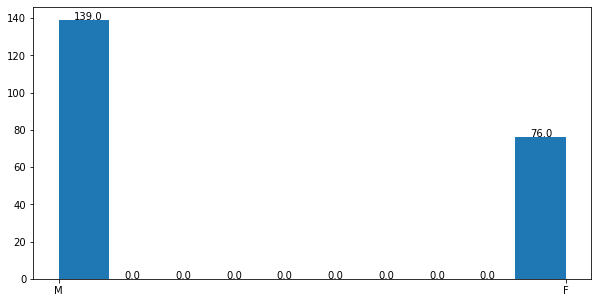

In [8]:
plt.figure(figsize = (10,5))
count, bins, _ = plt.hist(dup_data['gender'])

for n,b in zip(count,bins):
    plt.gca().text(b+.03, n, str(n))

- There are 139 instances with Gender 'M' and 76 instances with Gender 'F'

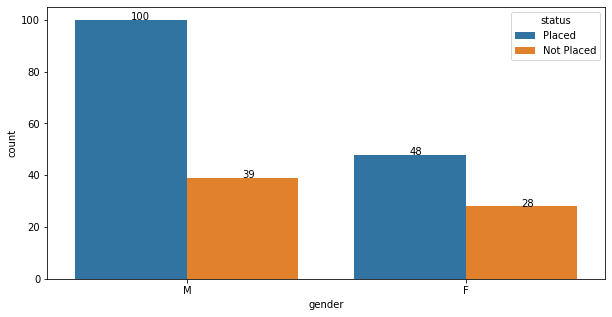

In [9]:
plt.figure(figsize=(10, 5))
ax = sns.countplot("gender", hue="status", data=dup_data)
for i in ax.patches:
    ax.annotate(i.get_height(), (i.get_x() + i.get_width()/2, i.get_height()))

- Here from the above diagram we can see that 100 Male students got placement and only 48 Female Students got placed.

Text(0.5, 0, 'Salary (100k)')

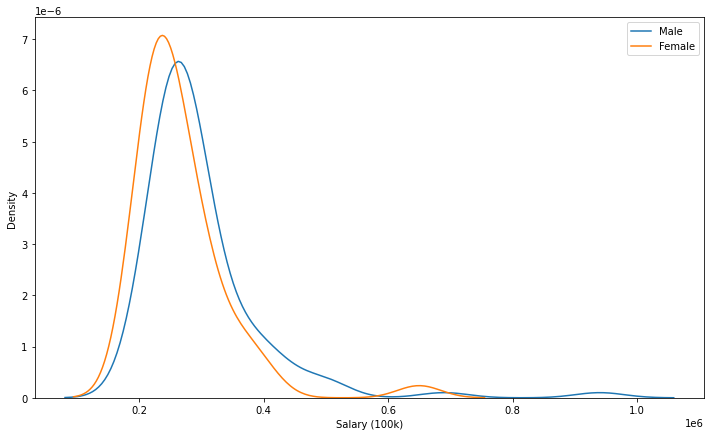

In [10]:
plt.figure(figsize=(12, 7))
sns.kdeplot(dup_data.salary[dup_data.gender=="M"])
sns.kdeplot(dup_data.salary[dup_data.gender=="F"])
plt.legend(["Male", "Female"])
plt.xlabel("Salary (100k)")

<AxesSubplot:xlabel='salary', ylabel='gender'>

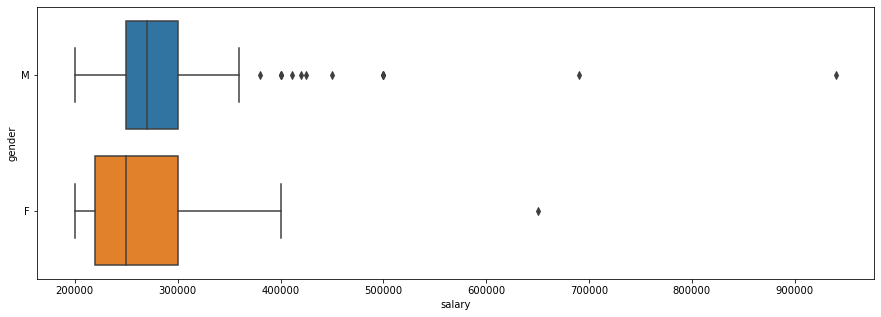

In [11]:
plt.figure(figsize =(15, 5))
sns.boxplot("salary", "gender", data=dup_data)

###### Sumarizing the above graphs we can say that we have 139 Male students and 76 Female students. In that we have 39 Male who did not get placed and 28 Females who did not get the placement. And from the above box plot we can see that Male students are offered with high salary than the females.

### Secondary Board of Educations

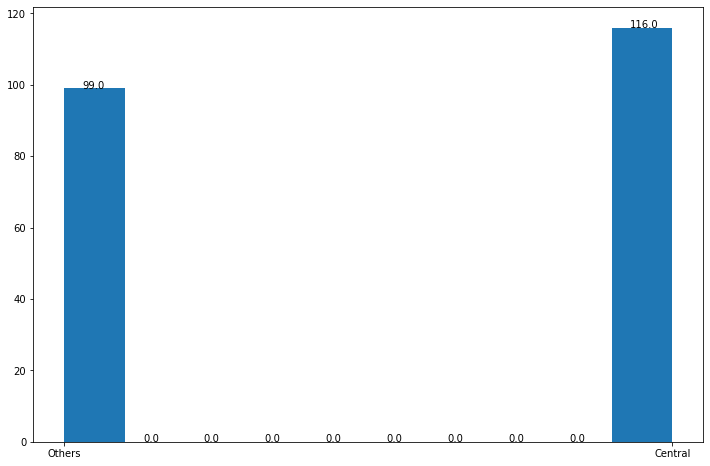

In [12]:
plt.figure(figsize=(12, 8))
counts, bins, _ = plt.hist(dup_data['ssc_b'])

for n, b in zip(counts, bins):
    plt.gca().text(b+0.03, n, str(n))

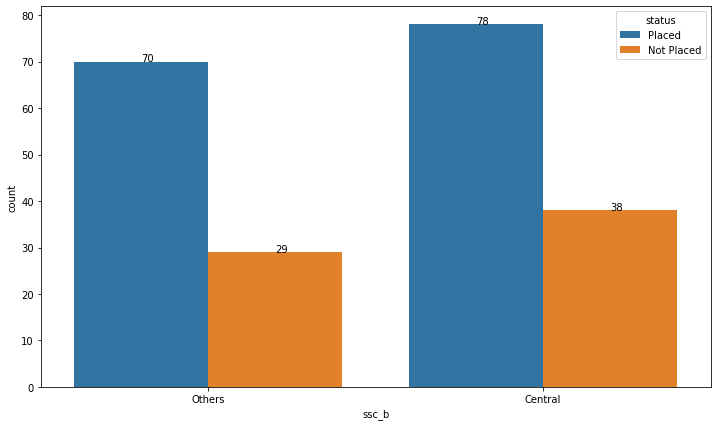

In [13]:
plt.figure(figsize=(12, 7))
ax = sns.countplot("ssc_b", hue="status", data=dup_data)
for i in ax.patches:
    ax.annotate(i.get_height(), (i.get_x() + i.get_width()/2, i.get_height()))

Text(0.5, 0, 'Secondary Education Percentage')

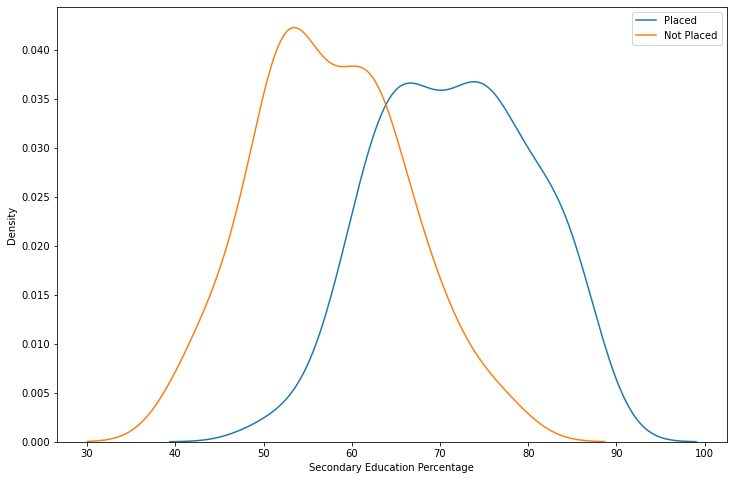

In [14]:
plt.figure(figsize=(12, 8))
sns.kdeplot(dup_data.ssc_p[dup_data.status=="Placed"])
sns.kdeplot(dup_data.ssc_p[dup_data.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Secondary Education Percentage")

<AxesSubplot:xlabel='salary', ylabel='ssc_b'>

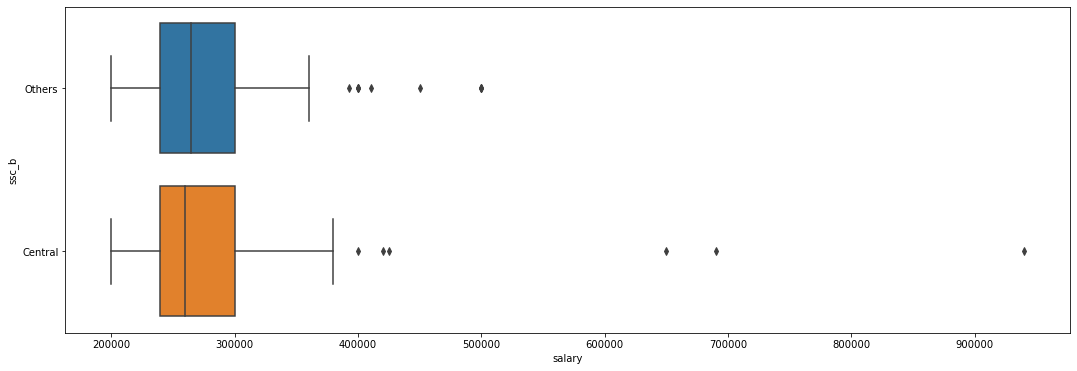

In [15]:
plt.figure(figsize =(18, 6))
sns.boxplot("salary", "ssc_b", data=dup_data)

From the above graphs we can say that we have 116 students from central Board and 99 students from the Other boards of Educations. And clearly we can see that there is not mch difference between the students getting placed and not placed with  board of education. The board of Education is not Affecting the Salary anymore.

### Higher Secondary Education

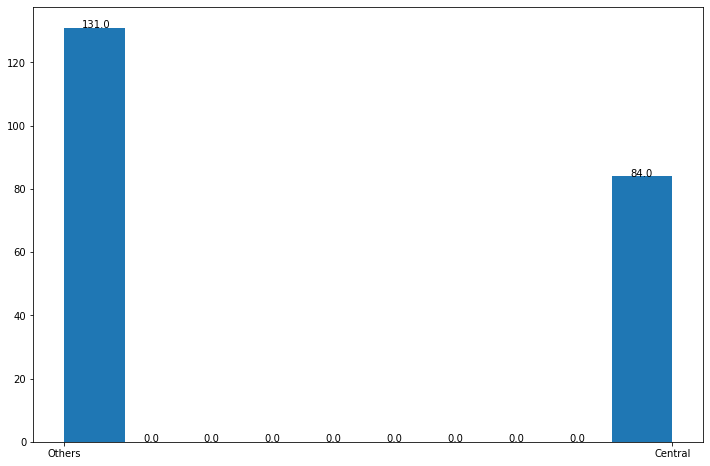

In [16]:
plt.figure(figsize=(12, 8))
counts, bins, _ = plt.hist(dup_data['hsc_b'])

for n, b in zip(counts, bins):
    plt.gca().text(b+0.03, n, str(n))

- We hav 84 instances from Central Board and 131 instances from other board of education at their Higher Secondary Education.

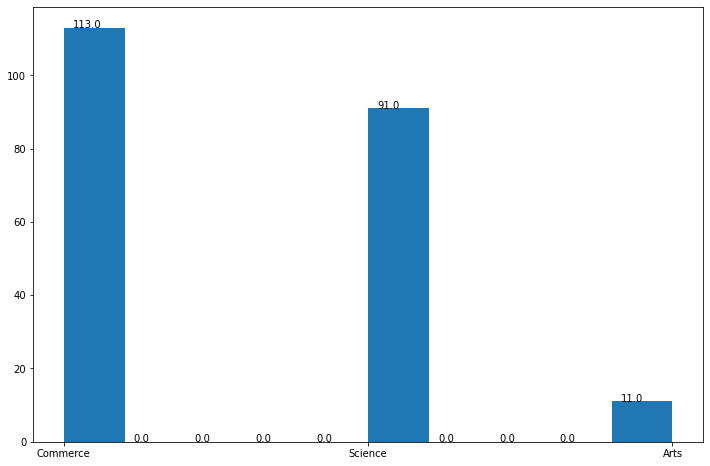

In [17]:
plt.figure(figsize=(12, 8))
counts, bins, _ = plt.hist(dup_data['hsc_s'])

for n, b in zip(counts, bins):
    plt.gca().text(b+0.03, n, str(n))

- We have samples of 113 Commerce students, 91 students from Science and 11 students from Arts.

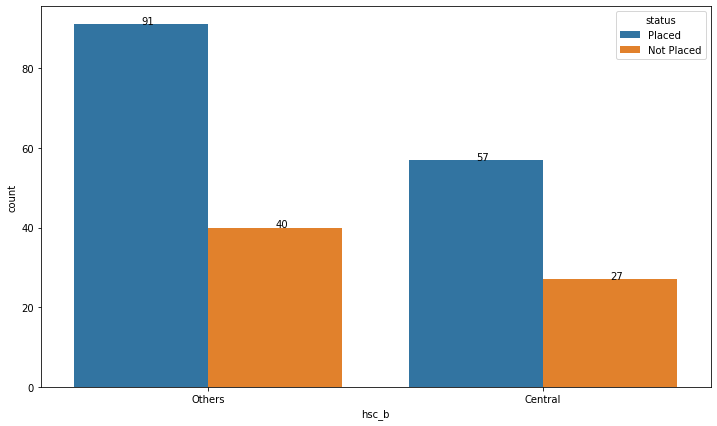

In [18]:
plt.figure(figsize=(12, 7))
ax = sns.countplot("hsc_b", hue="status", data=dup_data)
for i in ax.patches:
    ax.annotate(i.get_height(), (i.get_x() + i.get_width()/2, i.get_height()))

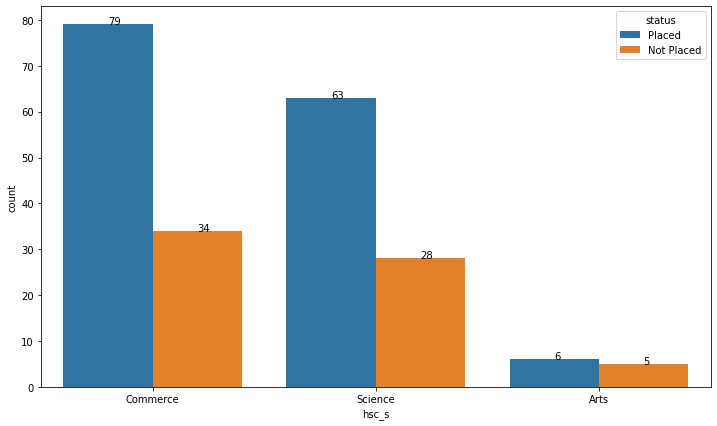

In [20]:
plt.figure(figsize=(12, 7))
ax = sns.countplot("hsc_s", hue="status", data=dup_data)
for i in ax.patches:
    ax.annotate(i.get_height(), (i.get_x() + i.get_width()/2, i.get_height()))

- In the data we have very less students with Arts Specialisation
- There is approximately 1:2 ration between unplaced and placed ratio with both Commerce and Science students

<AxesSubplot:xlabel='salary', ylabel='hsc_b'>

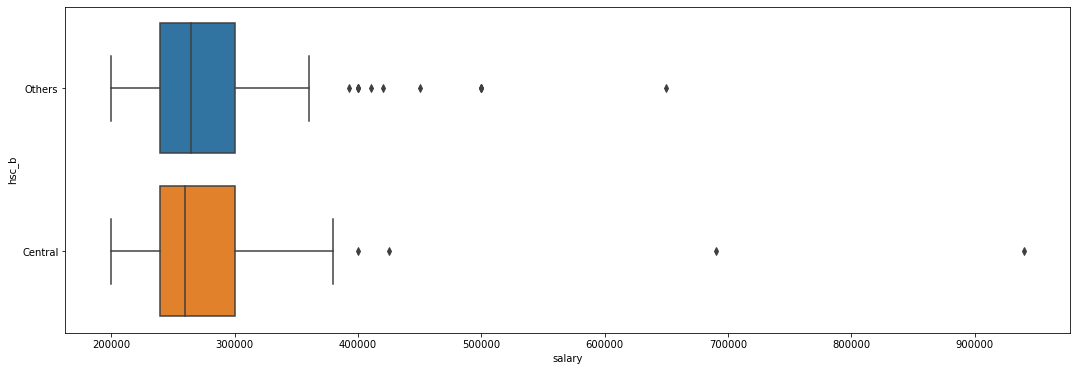

In [19]:
plt.figure(figsize =(18, 6))
sns.boxplot("salary", "hsc_b", data=dup_data)

- Here we can see Central Board has the highest package comapared to Other board students. And There are more high packages from Other board students. So, there is not much affect of Board of education on placement and package here also.

<AxesSubplot:xlabel='salary', ylabel='hsc_s'>

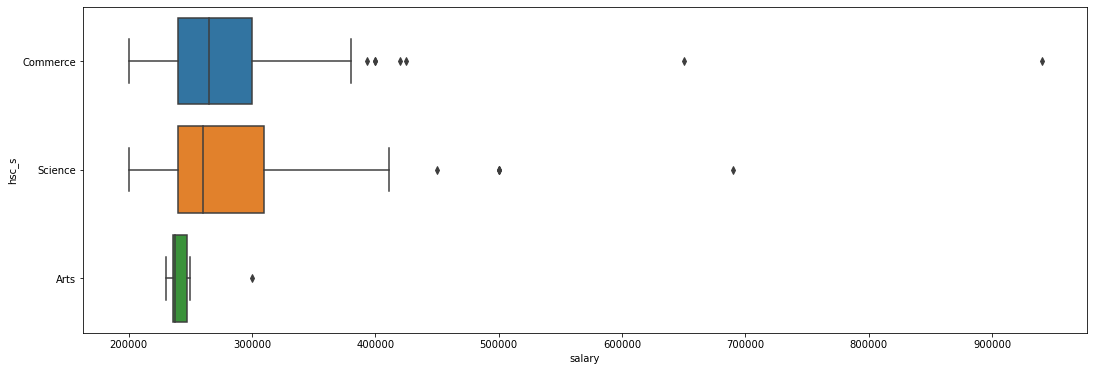

In [21]:
plt.figure(figsize =(18, 6))
sns.boxplot("salary", "hsc_s", data=dup_data)

- Commerce students have higher package compared to other branch students

Text(0.5, 0, 'Higher Secondary Education Percentage')

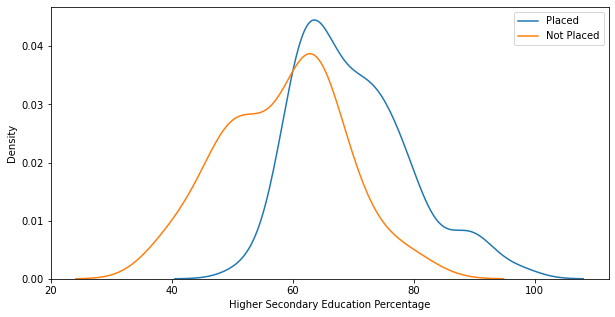

In [22]:
plt.figure(figsize=(10, 5))
sns.kdeplot(dup_data.hsc_p[dup_data.status=="Placed"])
sns.kdeplot(dup_data.hsc_p[dup_data.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Higher Secondary Education Percentage")

- Percentage must be atleast 60% or above to get more placements.

<AxesSubplot:xlabel='hsc_p', ylabel='salary'>

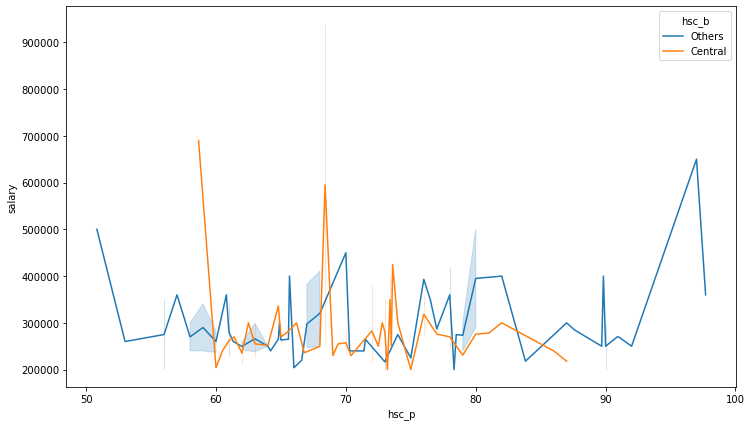

In [23]:
plt.figure(figsize=(12, 7))
sns.lineplot("hsc_p", "salary", hue="hsc_b", data=dup_data)

- As we have discussed before at the box plot between the board of education and salary, here we can see a diagram which tells the information of salary higher secondary percentage with their board.
    - we can see a high salary for both central and other board of education.
    - High salary for both high and low percentage.
    - Both the board of education and high school percentage does not affect the salary.

<AxesSubplot:xlabel='hsc_p', ylabel='salary'>

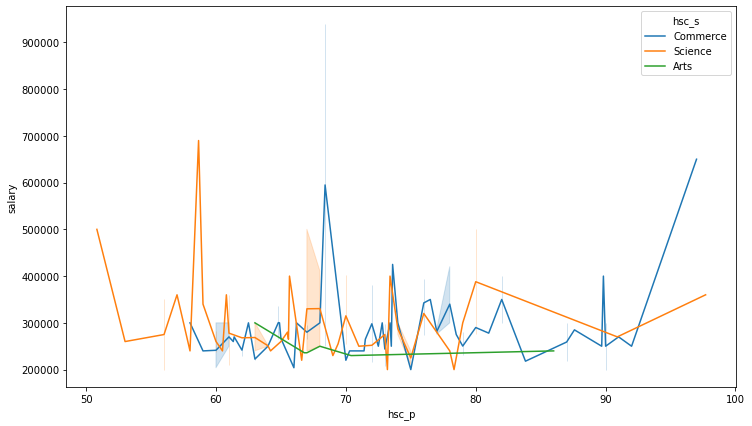

In [24]:
plt.figure(figsize=(12, 7))
sns.lineplot("hsc_p", "salary", hue="hsc_s", data=dup_data)

- In the above graph we can see that students with Arts specialisation have low salary.

### Degree percentage and Field of Study in Degree

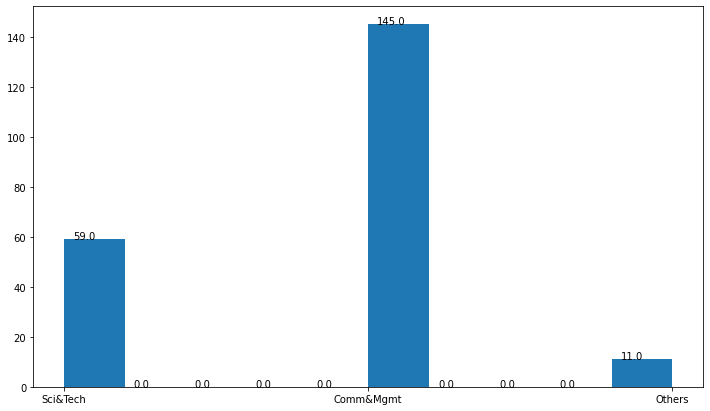

In [25]:
plt.figure(figsize=(12, 7))
counts, bins, _ = plt.hist(dup_data['degree_t'])

for n, b in zip(counts, bins):
    plt.gca().text(b+0.03, n, str(n))

- We have 59 Students from 'Science and Technology' and 145 student s from 'Commerce and Management' and 11 students from remaining braches.

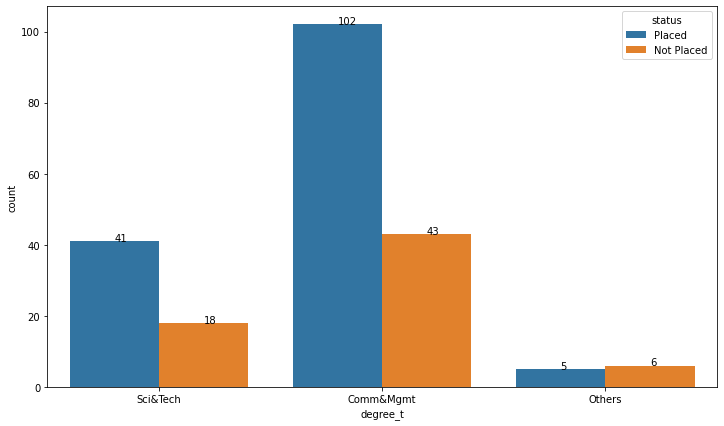

In [26]:
plt.figure(figsize=(12, 7))
ax = sns.countplot("degree_t", hue="status", data=dup_data)
for i in ax.patches:
    ax.annotate(i.get_height(), (i.get_x() + i.get_width()/2, i.get_height()))

- We have approximately 1:2 ratio between the stuent placed and unplaces for both Science and Commerce & Management Students.

<AxesSubplot:xlabel='salary', ylabel='degree_t'>

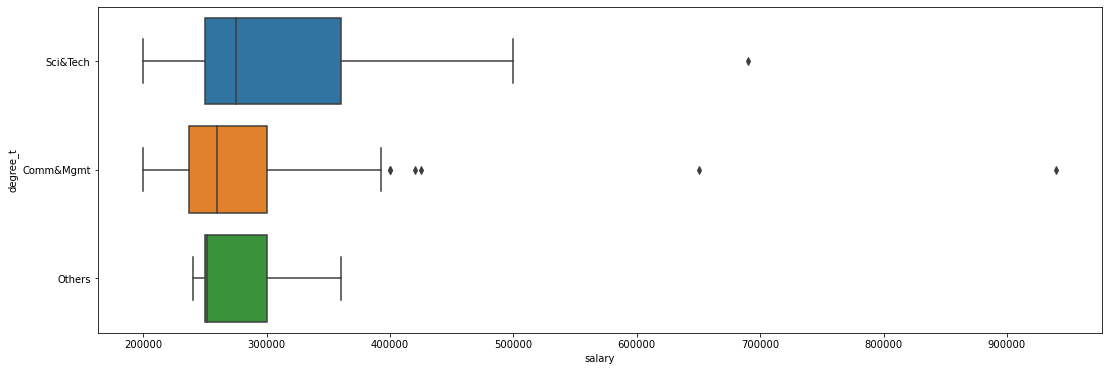

In [27]:
plt.figure(figsize =(18, 6))
sns.boxplot("salary", "degree_t", data=dup_data)

- Science & Technology students geting more salary on average and Commerce students got high salary jobs.

<AxesSubplot:xlabel='degree_p', ylabel='salary'>

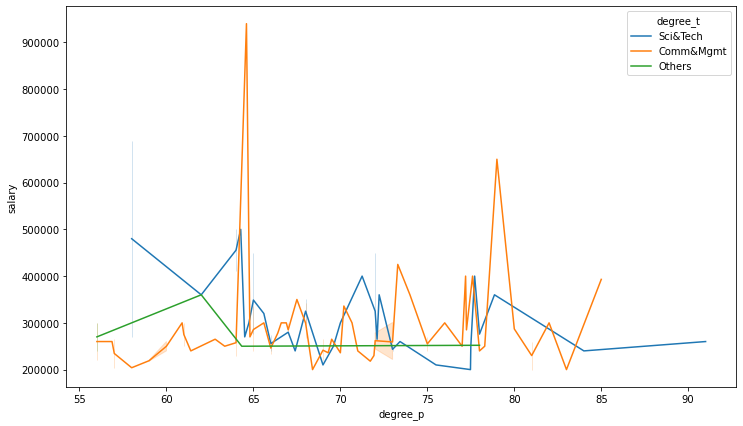

In [28]:
plt.figure(figsize=(12, 7))
sns.lineplot("degree_p", "salary", hue="degree_t", data=dup_data)

- There are one or two instances who got high salary jobs for Commerce and Management students. That means they are getting dream jobs Ocassionally.
- Atleast we need 55% percentage to get a placement.

### Work Experience

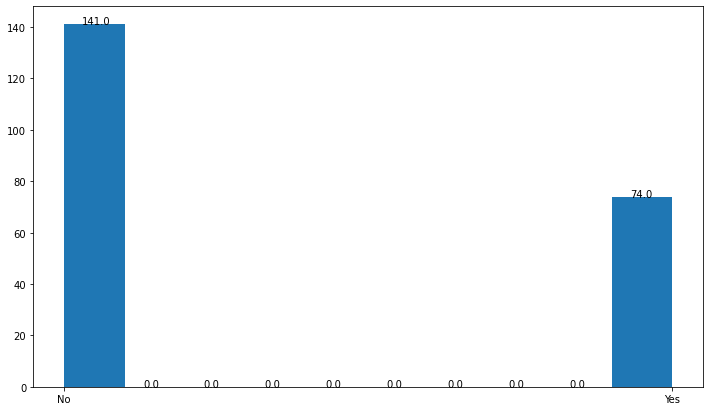

In [29]:
plt.figure(figsize=(12, 7))
counts, bins, _ = plt.hist(dup_data['workex'])

for n, b in zip(counts, bins):
    plt.gca().text(b+0.03, n, str(n))

- There are 141 Students without workexperience and 74 students with work experiece.

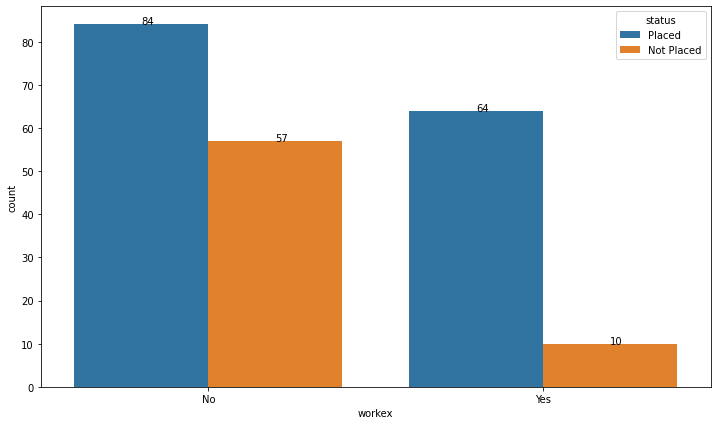

In [30]:
plt.figure(figsize=(12, 7))
ax = sns.countplot("workex", hue="status", data=dup_data)
for i in ax.patches:
    ax.annotate(i.get_height(), (i.get_x() + i.get_width()/2, i.get_height()))

- Very less number of students are not getting placed even if they have a work experience.

<AxesSubplot:xlabel='salary', ylabel='workex'>

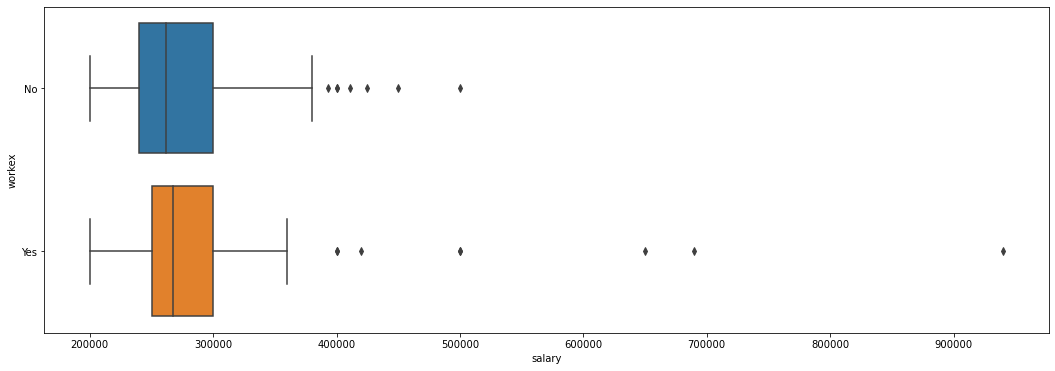

In [31]:
plt.figure(figsize =(18, 6))
sns.boxplot("salary", "workex", data=dup_data)

- Students with Work experience have high salaries compared to students without work experience.

### Post Gradation Field and Post graduation percentage.

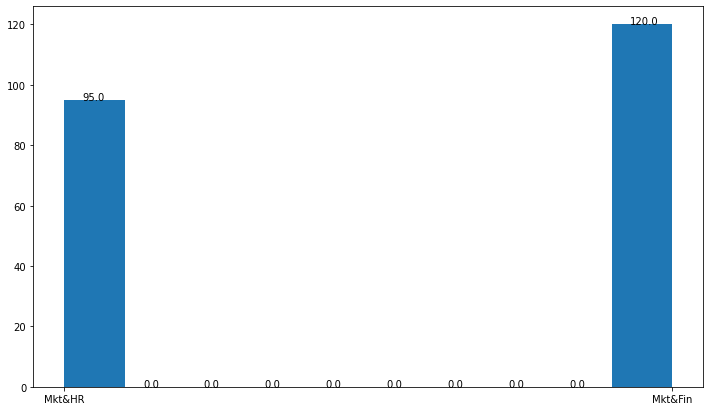

In [32]:
plt.figure(figsize=(12, 7))
counts, bins, _ = plt.hist(dup_data['specialisation'])

for n, b in zip(counts, bins):
    plt.gca().text(b+0.03, n, str(n))

- we have 95 Students from 'Marketing and HR' and 120 students from 'Marketing & Finance'

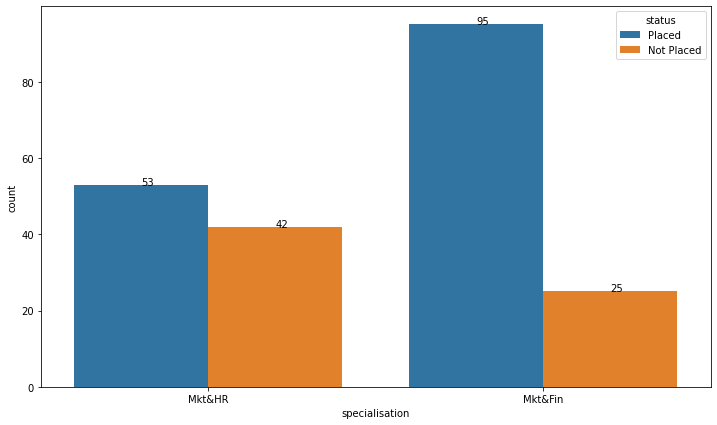

In [33]:
plt.figure(figsize=(12, 7))
ax = sns.countplot("specialisation", hue="status", data=dup_data)
for i in ax.patches:
    ax.annotate(i.get_height(), (i.get_x() + i.get_width()/2, i.get_height()))

- Very less number of students are not placed in Marketing and Finance specialisation

<AxesSubplot:xlabel='salary', ylabel='specialisation'>

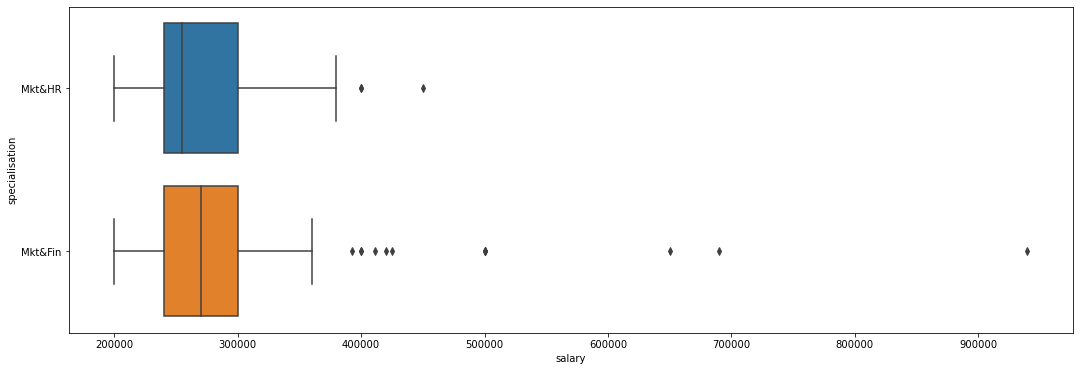

In [34]:
plt.figure(figsize =(18, 6))
sns.boxplot("salary", "specialisation", data=dup_data)

More Highly Paid Jobs for Mkt&Fin students

<AxesSubplot:xlabel='mba_p', ylabel='salary'>

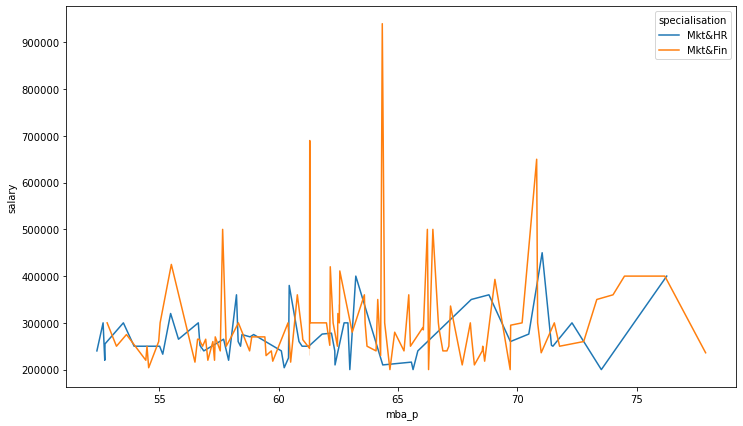

In [35]:
plt.figure(figsize=(12, 7))
sns.lineplot("mba_p", "salary", hue="specialisation", data=dup_data)

- Marketing and Finance students have more High salaries

### Conclusion on the Data Analysis

- There are many candidates who got placed and receved a package between 2L - 5L.
- Theres in only one candidate who got above 9L package.
- Most of the students have 60- 85% percentage in their education who got more placements.
- Work experience doesnt influence a candidate in the recruitment becuase we have students who did not have work experience but got more number of placements
- The academic percentages does not have any influence over the salaries.
- There is no use of Board of education towards the salary as well as placemnts so we do not need them.

### Handling the Mising Values

- Here we are removing the NaN value and replacing them to 0

In [36]:
dup_data['salary'].fillna(value = 0, inplace = True)

In [37]:
dup_data.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

- Now there are no null values in the dataset.

Now, lets have some exploration over the data before moving to any other Execution for the prediction

### Outlier Detection

To see whether we have outliers or not we use the Box plots

Text(0.5, 1.0, 'Degree Percenage')

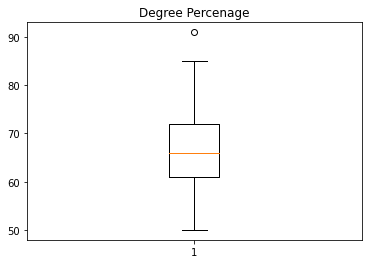

In [38]:
# Box plot for the Degree percentage

ax = plt.subplot(111)
plt.boxplot(dup_data['degree_p'])
ax.set_title('Degree Percenage')

We have only one outlier in the Degree percentage feature, and this will not effect out model at the time of our prediction.

Text(0.5, 1.0, 'Employability Percentage')

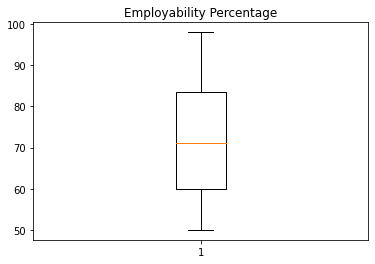

In [39]:
# box plot of Employability percentage

ax = plt.subplot(111)
plt.boxplot(dup_data['etest_p'])
ax.set_title('Employability Percentage')

In [ ]:
# Box plot for the Secondary school percentage

ax = plt.subplot(111)
plt.boxplot(dup_data['ssc_p'])
ax.set_title('Secondary School Percentage')

The Employability Percentage and Secondary School percentage doesn't have any outliers

Lets check with other columns as well...

Text(0.5, 1.0, 'Higher Secondary School Percentage')

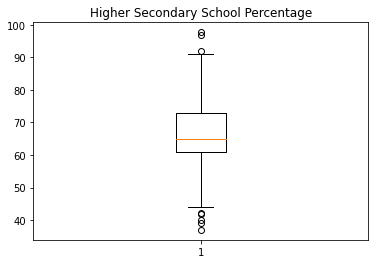

In [40]:
# Box plot for the Higher Secondary school percentage

ax = plt.subplot(111)
plt.boxplot(dup_data['hsc_p'])
ax.set_title('Higher Secondary School Percentage')

### Feature Extraction

In the dataset we have serial number, name of the education board which are useless for placement. Which means the recruiter will not take a look on your serial number and take a call on the placement.

The education board is not a column which does not help in recuriting because it doesn't matter if you have studied in the centeral board or the other board. So we need to remove these columns from our dataset

- The final Features we are selecting are:
    - Gender
    - Secondary Education Percentage
    - Higher Secondary Education Percentage
    - Specialization in Higher SEcondary Education
    - Under-graduation Degree Percentage
    - Under Graduation Degree Field.
    - Work Experience
    - Employablity test percentage
    - Specialization
    - MBA Percentage

In [41]:
# droping the serial no and board of education details from the dataset
dup_data.drop(['sl_no','ssc_b','hsc_b'], axis = 1, inplace = True)
dup_data.head(10)

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,M,55.00,49.80,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,0.0
6,F,46.00,49.20,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,0.0
7,M,82.00,64.00,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,M,73.00,79.00,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,M,58.00,70.00,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,0.0


There might be some unusual values in the dataset which might result in having outliers. If in case if we have outliers then we might not get a accurate prediction. so let's check whether we have outliers in the dataset or not.

### Feature Encoding

- In gender we have Male as M and Female as F, so we are changing the M - 0 and F - 1
- In work Experience we have Yes and No, so we are changing Yes - 1 and No - 0
- In status we have Placed or Not Placed, so we are changing Placed - 1 and Not Placed - 0
- In Specialisation we have Mkt&HR or Mkk&Fin, so we are chaning Mkk&Fin - 1 and Mkt&HR - 0

In [42]:
dup_data['gender'] = dup_data.gender.map({"M" : 0, "F" : 1})
dup_data['workex'] = dup_data.workex.map({"Yes" : 1, "No" : 0})
dup_data['status'] = dup_data.status.map({"Placed" : 1, "Not Placed" : 0})
dup_data['specialisation'] = dup_data.specialisation.map({"Mkt&HR" : 0, "Mkt&Fin" : 1})

In [43]:
dup_data

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,0,67.00,91.00,Commerce,58.00,Sci&Tech,0,55.0,0,58.80,1,270000.0
1,0,79.33,78.33,Science,77.48,Sci&Tech,1,86.5,1,66.28,1,200000.0
2,0,65.00,68.00,Arts,64.00,Comm&Mgmt,0,75.0,1,57.80,1,250000.0
3,0,56.00,52.00,Science,52.00,Sci&Tech,0,66.0,0,59.43,0,0.0
4,0,85.80,73.60,Commerce,73.30,Comm&Mgmt,0,96.8,1,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
210,0,80.60,82.00,Commerce,77.60,Comm&Mgmt,0,91.0,1,74.49,1,400000.0
211,0,58.00,60.00,Science,72.00,Sci&Tech,0,74.0,1,53.62,1,275000.0
212,0,67.00,67.00,Commerce,73.00,Comm&Mgmt,1,59.0,1,69.72,1,295000.0
213,1,74.00,66.00,Commerce,58.00,Comm&Mgmt,0,70.0,0,60.23,1,204000.0


- Let's perform One Hot encoding on hsc_s and degree_t features
- What we do is we will create some dummies say, we will create 3 new columns for hsc_s called d_commerce and d_science and d_arts.
- if the student is Commerce then we will have value 1 in d_commerce and 0 in other columns.

### One Hot Encoding

In [44]:
d_hsc_s = pd.get_dummies(dup_data['hsc_s'], prefix = 'd_')
d_degree_t = pd.get_dummies(dup_data['degree_t'], prefix = 'd_')

In [45]:
d_hsc_s.head(10)

,d__Arts,d__Commerce,d__Science
0,0,1,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
5,0,0,1
6,0,1,0
7,0,0,1
8,0,1,0
9,0,1,0


In [46]:
d_degree_t.head(10)

,d__Comm&Mgmt,d__Others,d__Sci&Tech
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,1,0,0
5,0,0,1
6,1,0,0
7,0,0,1
8,1,0,0
9,1,0,0


In [47]:
dup_data.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,0,67.00,91.00,Commerce,58.00,Sci&Tech,0,55.0,0,58.80,1,270000.0
1,0,79.33,78.33,Science,77.48,Sci&Tech,1,86.5,1,66.28,1,200000.0
2,0,65.00,68.00,Arts,64.00,Comm&Mgmt,0,75.0,1,57.80,1,250000.0
3,0,56.00,52.00,Science,52.00,Sci&Tech,0,66.0,0,59.43,0,0.0
4,0,85.80,73.60,Commerce,73.30,Comm&Mgmt,0,96.8,1,55.50,1,425000.0


- Lets append these columns to our data and remove the original columns

In [48]:
dup_data = pd.concat([d_hsc_s, d_degree_t, dup_data], axis = 1)
dup_data.head()

,d__Arts,d__Commerce,d__Science,d__Comm&Mgmt,d__Others,d__Sci&Tech,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,0,1,0,0,0,1,0,67.00,91.00,Commerce,58.00,Sci&Tech,0,55.0,0,58.80,1,270000.0
1,0,0,1,0,0,1,0,79.33,78.33,Science,77.48,Sci&Tech,1,86.5,1,66.28,1,200000.0
2,1,0,0,1,0,0,0,65.00,68.00,Arts,64.00,Comm&Mgmt,0,75.0,1,57.80,1,250000.0
3,0,0,1,0,0,1,0,56.00,52.00,Science,52.00,Sci&Tech,0,66.0,0,59.43,0,0.0
4,0,1,0,1,0,0,0,85.80,73.60,Commerce,73.30,Comm&Mgmt,0,96.8,1,55.50,1,425000.0


- Droping the origingal columns

In [49]:
dup_data.drop(['hsc_s','degree_t'], axis = 1, inplace = True)
dup_data.head()

,d__Arts,d__Commerce,d__Science,d__Comm&Mgmt,d__Others,d__Sci&Tech,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,salary
0,0,1,0,0,0,1,0,67.00,91.00,58.00,0,55.0,0,58.80,1,270000.0
1,0,0,1,0,0,1,0,79.33,78.33,77.48,1,86.5,1,66.28,1,200000.0
2,1,0,0,1,0,0,0,65.00,68.00,64.00,0,75.0,1,57.80,1,250000.0
3,0,0,1,0,0,1,0,56.00,52.00,52.00,0,66.0,0,59.43,0,0.0
4,0,1,0,1,0,0,0,85.80,73.60,73.30,0,96.8,1,55.50,1,425000.0


- Lets predict the students will get placed or not which is a Binary classification problem

## Binary Classification Problem

In [50]:
dup_1 = dup_data
dup_1.drop(columns=['salary'], inplace = True)
dup_1

,d__Arts,d__Commerce,d__Science,d__Comm&Mgmt,d__Others,d__Sci&Tech,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status
0,0,1,0,0,0,1,0,67.00,91.00,58.00,0,55.0,0,58.80,1
1,0,0,1,0,0,1,0,79.33,78.33,77.48,1,86.5,1,66.28,1
2,1,0,0,1,0,0,0,65.00,68.00,64.00,0,75.0,1,57.80,1
3,0,0,1,0,0,1,0,56.00,52.00,52.00,0,66.0,0,59.43,0
4,0,1,0,1,0,0,0,85.80,73.60,73.30,0,96.8,1,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0,1,0,1,0,0,0,80.60,82.00,77.60,0,91.0,1,74.49,1
211,0,0,1,0,0,1,0,58.00,60.00,72.00,0,74.0,1,53.62,1
212,0,1,0,1,0,0,0,67.00,67.00,73.00,1,59.0,1,69.72,1
213,0,1,0,1,0,0,1,74.00,66.00,58.00,0,70.0,0,60.23,1


### Logistic regression:

In [51]:
x = dup_1.drop(['status'],axis = 1)
y = dup_1.status

In [52]:
new_header = x.iloc[0]
x = x[0:]
x.columns = new_header

In [53]:
print(x)
print(y)

0    0.0   1.0   0.0   0.0   0.0   1.0   0.0    67.0   91.0   58.0  0.0   \
0       0     1     0     0     0     1     0  67.00  91.00  58.00     0   
1       0     0     1     0     0     1     0  79.33  78.33  77.48     1   
2       1     0     0     1     0     0     0  65.00  68.00  64.00     0   
3       0     0     1     0     0     1     0  56.00  52.00  52.00     0   
4       0     1     0     1     0     0     0  85.80  73.60  73.30     0   
..    ...   ...   ...   ...   ...   ...   ...    ...    ...    ...   ...   
210     0     1     0     1     0     0     0  80.60  82.00  77.60     0   
211     0     0     1     0     0     1     0  58.00  60.00  72.00     0   
212     0     1     0     1     0     0     0  67.00  67.00  73.00     1   
213     0     1     0     1     0     0     1  74.00  66.00  58.00     0   
214     0     0     1     1     0     0     0  62.00  58.00  53.00     0   

0    55.0  0.0    58.8  
0    55.0     0  58.80  
1    86.5     1  66.28  
2    75.0   

In [54]:
# for suppose the splitting factor to be 0.8 which is 80%
sf = 0.8
n_train = math.floor(sf * x.shape[0])
n_test = math.ceil((1-sf) * x.shape[0])

x_train = x[:n_train]
y_train = y[:n_train]
x_test = x[n_train:]
y_test = y[n_train:]

print("xtrain:",x_train.shape[0])
print("xtest:",x_test.shape[0])
print("ytrain:",y_train.shape[0])
print("ytest:",y_test.shape[0])

xtrain: 172
xtest: 43
ytrain: 172
ytest: 43


In [55]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))


class LogisticRegression():
    
    def __init__(self, lr, n_iters = 1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)
            
            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions - y)
            
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db
            
    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y<0.5 else 1 for y in y_pred]
        return class_pred

In [56]:
clf_lr = LogisticRegression(lr = 0.001)
clf_lr.fit(x_train,y_train)
y_pred = clf_lr.predict(x_test)

def accuracy(y_pred,y_test):
    return np.sum(y_pred == y_test)/len(y_test)

logistic_acc = accuracy(y_pred, y_test)

In [57]:
# sklearns logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred_sk = logreg.predict(x_test)
logistic_acc_sk = logreg.score(x_test, y_test)

In [58]:
print('Accuracy of logistic regression with sklearn: {:.2f}'.format(logistic_acc_sk))
print('Accuracy of logistic regression without sklearn: {:.2f}'.format(logistic_acc))

Accuracy of logistic regression with sklearn: 0.88
Accuracy of logistic regression without sklearn: 0.86


In [59]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.94      0.83        16
           1       0.96      0.81      0.88        27

    accuracy                           0.86        43
   macro avg       0.85      0.88      0.86        43
weighted avg       0.88      0.86      0.86        43



In [60]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[15  1]
 [ 5 22]]


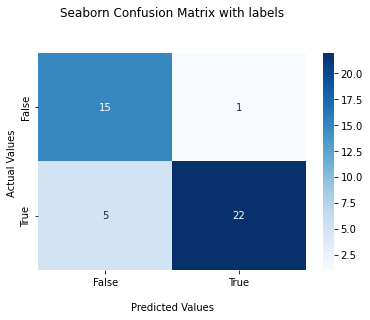

In [61]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### K - Nearest Neighbours

In [62]:
def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        # compute the distance
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
    
        # get the closest k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # majority voye
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]

In [63]:
x = dup_1.drop(['status'],axis = 1)
y = dup_1.status

In [64]:
new_header = x.iloc[0]
x = x[0:]
x.columns = new_header

In [65]:
print(x)
print(y)

0    0.0   1.0   0.0   0.0   0.0   1.0   0.0    67.0   91.0   58.0  0.0   \
0       0     1     0     0     0     1     0  67.00  91.00  58.00     0   
1       0     0     1     0     0     1     0  79.33  78.33  77.48     1   
2       1     0     0     1     0     0     0  65.00  68.00  64.00     0   
3       0     0     1     0     0     1     0  56.00  52.00  52.00     0   
4       0     1     0     1     0     0     0  85.80  73.60  73.30     0   
..    ...   ...   ...   ...   ...   ...   ...    ...    ...    ...   ...   
210     0     1     0     1     0     0     0  80.60  82.00  77.60     0   
211     0     0     1     0     0     1     0  58.00  60.00  72.00     0   
212     0     1     0     1     0     0     0  67.00  67.00  73.00     1   
213     0     1     0     1     0     0     1  74.00  66.00  58.00     0   
214     0     0     1     1     0     0     0  62.00  58.00  53.00     0   

0    55.0  0.0    58.8  
0    55.0     0  58.80  
1    86.5     1  66.28  
2    75.0   

In [66]:
# for suppose the splitting factor to be 0.8 which is 80%
sf = 0.8
n_train = math.floor(sf * x.shape[0])
n_test = math.ceil((1-sf) * x.shape[0])

x_train = x[:n_train]
y_train = y[:n_train]
x_test = x[n_train:]
y_test = y[n_train:]

print("xtrain:",x_train.shape[0])
print("xtest:",x_test.shape[0])
print("ytrain:",y_train.shape[0])
print("ytest:",y_test.shape[0])

xtrain: 172
xtest: 43
ytrain: 172
ytest: 43


In [67]:
a_train = x_train.to_numpy()
b_train = y_train.to_numpy()
a_test = x_test.to_numpy()
b_test = y_test.to_numpy()

In [68]:
clf = KNN(k=3)
clf.fit(a_train, b_train)
predictions = clf.predict(a_test)

knn_acc = np.sum(predictions == b_test) / len(b_test)
print(knn_acc)

0.7906976744186046


In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(a_train, b_train)
y_pred = knn.predict(a_test)
knn_acc_sk = accuracy_score(y_pred, b_test)

print("Accuracy of KNN with sklearn:", knn_acc_sk)
print("Accuracy of KNN without sklearn:", knn_acc)

Accuracy of KNN with sklearn: 0.7906976744186046
Accuracy of KNN without sklearn: 0.7906976744186046


In [70]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(b_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.56      0.67        16
           1       0.78      0.93      0.85        27

    accuracy                           0.79        43
   macro avg       0.80      0.74      0.76        43
weighted avg       0.79      0.79      0.78        43



In [71]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, predictions)
print(cf_matrix)

[[ 9  7]
 [ 2 25]]


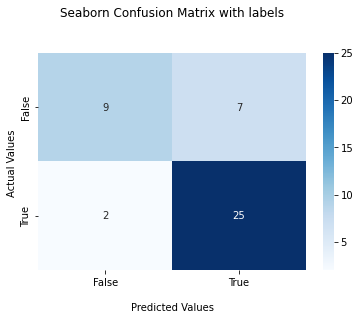

In [72]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### Decision Trees

In [84]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        
    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=10, n_features=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        # check the stopping criteria
        if (depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)

        
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)


    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold


    def _information_gain(self, y, X_column, threshold):

        parent_entropy = self._entropy(y)

        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
        
        
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

 
        information_gain = parent_entropy - child_entropy
        return information_gain

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p>0])


    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

In [74]:
x = dup_1.drop(['status'],axis = 1)
y = dup_1.status

In [75]:
x_cols = x.columns

In [76]:
new_header = x.iloc[0]
x = x[0:]
x.columns = new_header

In [77]:
print(x)
print(y)

0    0.0   1.0   0.0   0.0   0.0   1.0   0.0    67.0   91.0   58.0  0.0   \
0       0     1     0     0     0     1     0  67.00  91.00  58.00     0   
1       0     0     1     0     0     1     0  79.33  78.33  77.48     1   
2       1     0     0     1     0     0     0  65.00  68.00  64.00     0   
3       0     0     1     0     0     1     0  56.00  52.00  52.00     0   
4       0     1     0     1     0     0     0  85.80  73.60  73.30     0   
..    ...   ...   ...   ...   ...   ...   ...    ...    ...    ...   ...   
210     0     1     0     1     0     0     0  80.60  82.00  77.60     0   
211     0     0     1     0     0     1     0  58.00  60.00  72.00     0   
212     0     1     0     1     0     0     0  67.00  67.00  73.00     1   
213     0     1     0     1     0     0     1  74.00  66.00  58.00     0   
214     0     0     1     1     0     0     0  62.00  58.00  53.00     0   

0    55.0  0.0    58.8  
0    55.0     0  58.80  
1    86.5     1  66.28  
2    75.0   

In [78]:
# for suppose the splitting factor to be 0.85 which is 85%
sf = 0.85
n_train = math.floor(sf * x.shape[0])
n_test = math.ceil((1-sf) * x.shape[0])

x_train = x[:n_train]
y_train = y[:n_train]
x_test = x[n_train:]
y_test = y[n_train:]

print("xtrain:",x_train.shape[0])
print("xtest:",x_test.shape[0])
print("ytrain:",y_train.shape[0])
print("ytest:",y_test.shape[0])

xtrain: 182
xtest: 33
ytrain: 182
ytest: 33


In [79]:
a_train = x_train.to_numpy()
b_train = y_train.to_numpy()
a_test = x_test.to_numpy()
b_test = y_test.to_numpy()

In [85]:
clf_dt = DecisionTree()
clf_dt.fit(a_train, b_train)
predictions_dt = clf.predict(a_test)
dt_acc = np.sum(b_test == predictions_dt) / len(b_test)
print(dt_acc)

0.8181818181818182


In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf_dt_sk = DecisionTreeClassifier()
clf_dt_sk.fit(a_train, b_train)
y_pred = clf_dt.predict(a_test)
dt_acc_sk = accuracy_score(y_pred, b_test)

print("Accuracy of DT with sklearn:", dt_acc_sk)
print("Accuracy of DT without sklearn:", dt_acc)

Accuracy of DT with sklearn: 0.8181818181818182
Accuracy of DT without sklearn: 0.8181818181818182


In [87]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(b_test, predictions_dt))

              precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.80      0.95      0.87        21

    accuracy                           0.82        33
   macro avg       0.84      0.77      0.78        33
weighted avg       0.83      0.82      0.81        33



In [89]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(b_test, predictions_dt)
print(cf_matrix)

[[ 7  5]
 [ 1 20]]


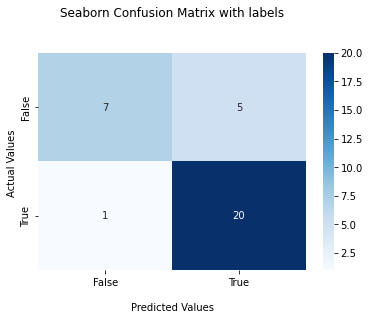

In [90]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()